In [1]:
#importing the usual suspects
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#import dataset
df = pd.read_csv("HR_Data.csv")
df.head()


,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [3]:
# info of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 18 columns):
SLNO                           8998 non-null int64
Candidate.Ref                  8998 non-null int64
DOJ.Extended                   8998 non-null object
Duration.to.accept.offer       8998 non-null int64
Notice.period                  8998 non-null int64
Offered.band                   8998 non-null object
Pecent.hike.expected.in.CTC    8998 non-null float64
Percent.hike.offered.in.CTC    8998 non-null float64
Percent.difference.CTC         8998 non-null float64
Joining.Bonus                  8998 non-null object
Candidate.relocate.actual      8998 non-null object
Gender                         8998 non-null object
Candidate.Source               8998 non-null object
Rex.in.Yrs                     8998 non-null int64
LOB                            8998 non-null object
Location                       8998 non-null object
Age                            8998 non-null int64
Status      

In [4]:
#identify duplicates records in the data
dupes=df.duplicated()
sum(dupes)


3

In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)




In [6]:
#removing duplicates
df_uniq=df.drop_duplicates()
df_uniq.shape
df_uniq.is_copy=False

In [7]:
df_uniq.describe()

,SLNO,Candidate.Ref,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age
count,8995.000000,8.995000e+03,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,5970.984325,2.843647e+06,21.434464,39.291829,43.864804,40.657356,-1.573802,4.239022,29.913174
std,3373.963454,4.863448e+05,25.811616,22.220239,29.788975,36.064060,19.610729,2.547571,4.097912
min,1.000000,2.109586e+06,0.000000,0.000000,-68.830000,-60.530000,-67.270000,0.000000,20.000000
25%,3207.500000,2.386476e+06,3.000000,30.000000,27.270000,22.090000,-8.330000,3.000000,27.000000
50%,5976.000000,2.807482e+06,10.000000,30.000000,40.000000,36.000000,0.000000,4.000000,29.000000
75%,8739.000000,3.300060e+06,33.000000,60.000000,53.850000,50.000000,0.000000,6.000000,34.000000
max,12333.000000,3.836076e+06,224.000000,120.000000,359.770000,471.430000,300.000000,24.000000,60.000000


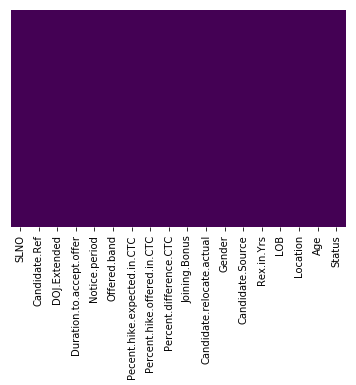

In [8]:
#heatmap to check missing values
sns.heatmap(df_uniq.isnull(),cbar=False,yticklabels=False,cmap='viridis')

Eliminated duplicate values and no null values found.

In [9]:
#just to make sure
df_uniq[df_uniq.isnull()].count()

SLNO                           0
Candidate.Ref                  0
DOJ.Extended                   0
Duration.to.accept.offer       0
Notice.period                  0
Offered.band                   0
Pecent.hike.expected.in.CTC    0
Percent.hike.offered.in.CTC    0
Percent.difference.CTC         0
Joining.Bonus                  0
Candidate.relocate.actual      0
Gender                         0
Candidate.Source               0
Rex.in.Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

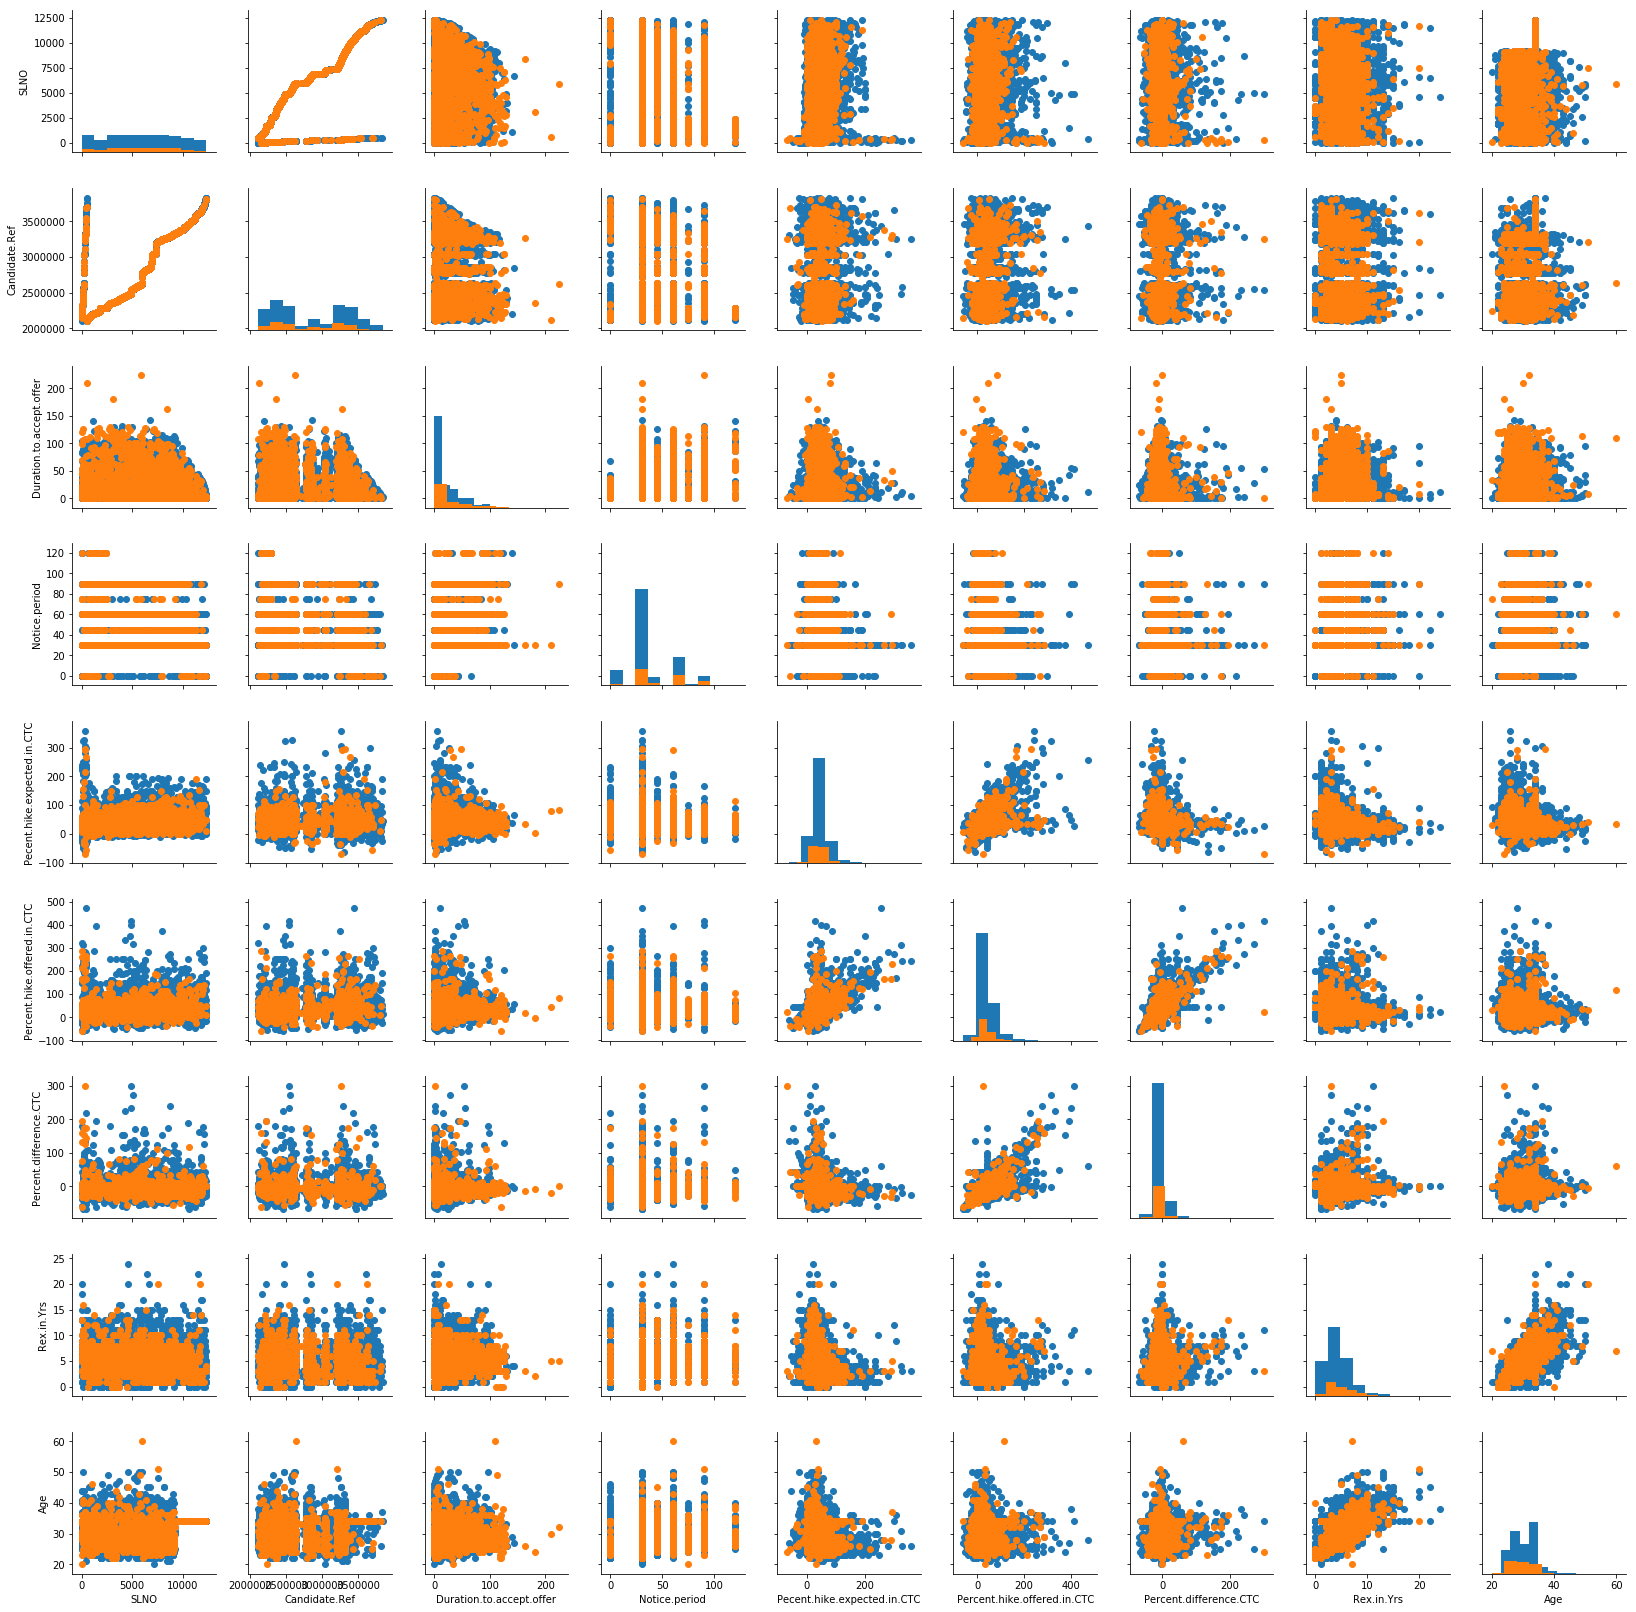

In [10]:
g = sns.PairGrid(df_uniq,hue='Status')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

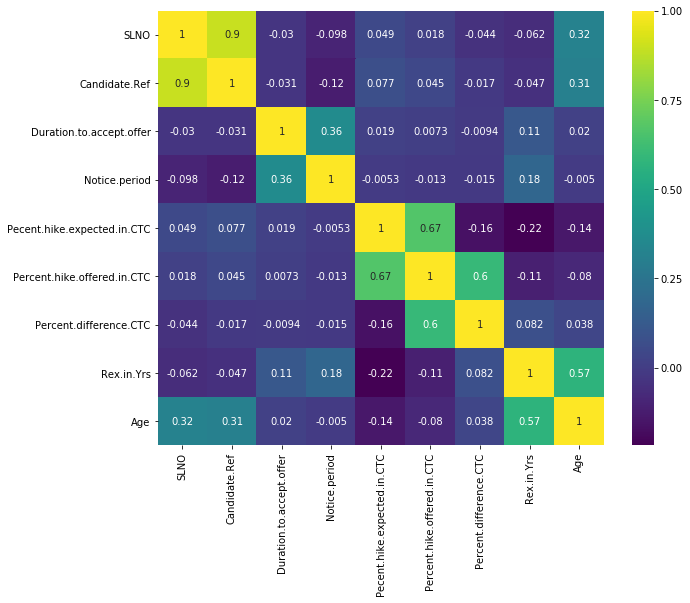

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df_uniq.corr(),cmap='viridis',annot=True)

Percenctage hike offered and percentage hike expected has high corelation with each other than the other variables.<br>
Duration to accept the offer and notice period are corelated with each other<br>
Age and year of experience are corelated.

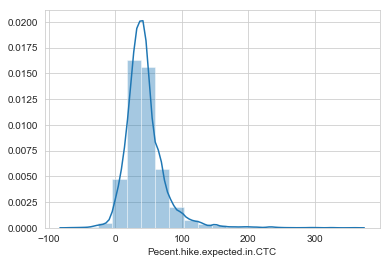

In [12]:
sns.set_style('whitegrid')
sns.distplot(df_uniq['Pecent.hike.expected.in.CTC'],bins=20)

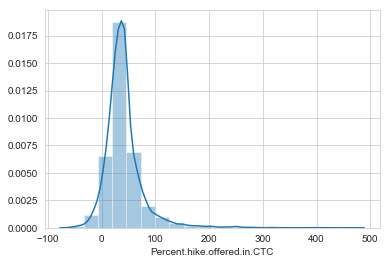

In [13]:
sns.set_style('whitegrid')
sns.distplot(df_uniq['Percent.hike.offered.in.CTC'],bins=20)

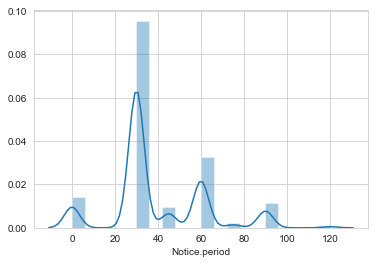

In [14]:
sns.set_style('whitegrid')
sns.distplot(df_uniq['Notice.period'],bins=20)

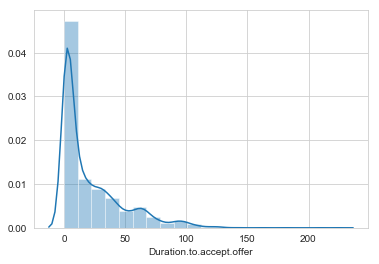

In [15]:
sns.set_style('whitegrid')
sns.distplot(df_uniq['Duration.to.accept.offer'],bins=20)

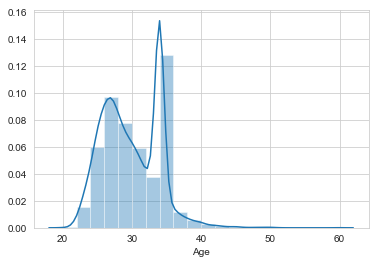

In [16]:
sns.set_style('whitegrid')
sns.distplot(df_uniq['Age'],bins=20)

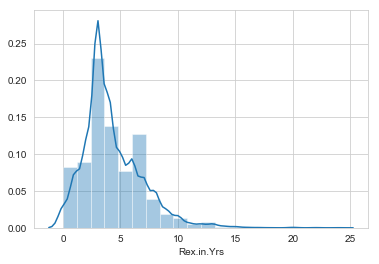

In [17]:
sns.set_style('whitegrid')
sns.distplot(df_uniq['Rex.in.Yrs'],bins=20)

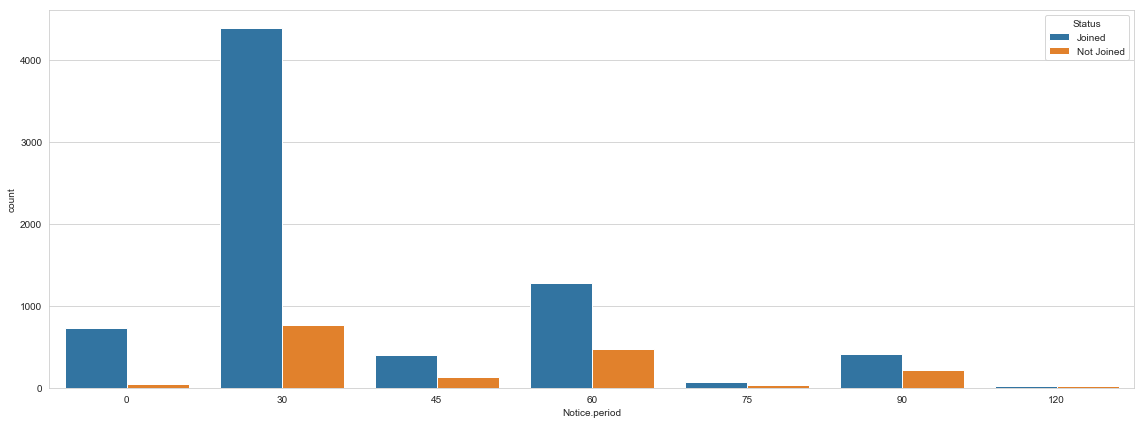

In [18]:
plt.figure(figsize=(16,6))
sns.countplot(df_uniq['Notice.period'],hue=df_uniq['Status'])
plt.tight_layout()

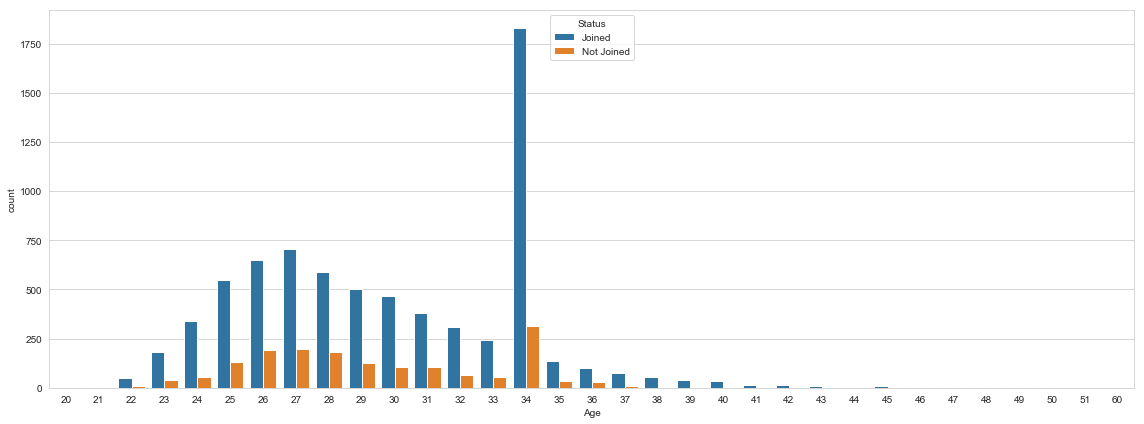

In [19]:
plt.figure(figsize=(16,6))
sns.countplot(df_uniq['Age'],hue=df_uniq['Status'])
plt.tight_layout()

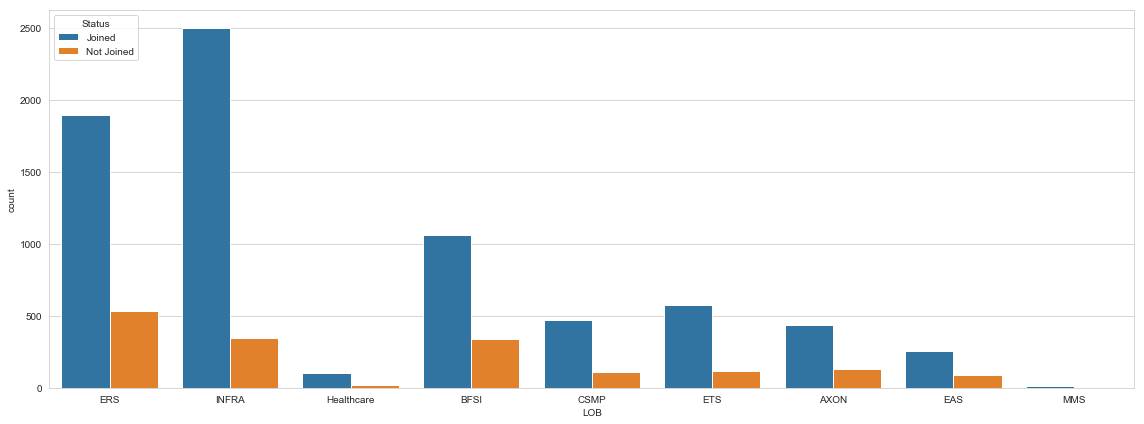

In [20]:
plt.figure(figsize=(16,6))
sns.countplot(df_uniq['LOB'],hue=df_uniq['Status'])
plt.tight_layout()

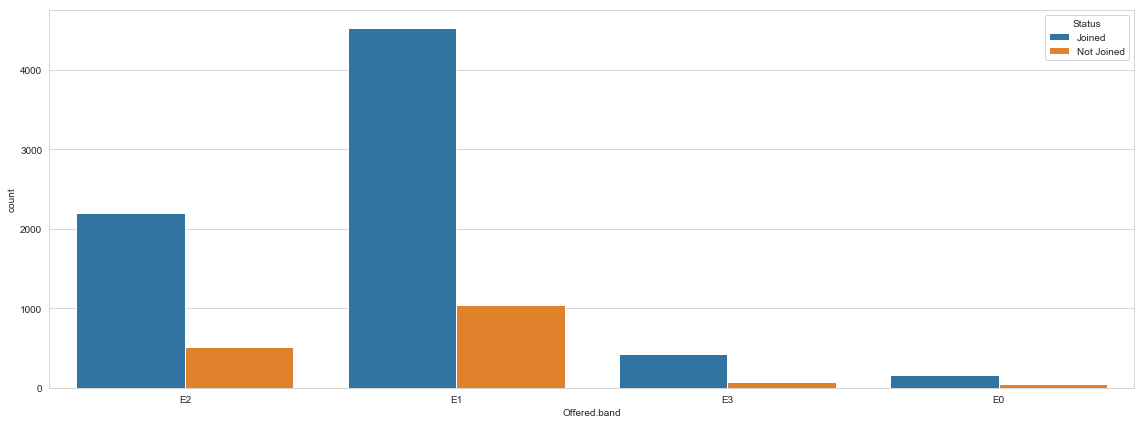

In [21]:
plt.figure(figsize=(16,6))
sns.countplot(df_uniq['Offered.band'],hue=df_uniq['Status'])
plt.tight_layout()

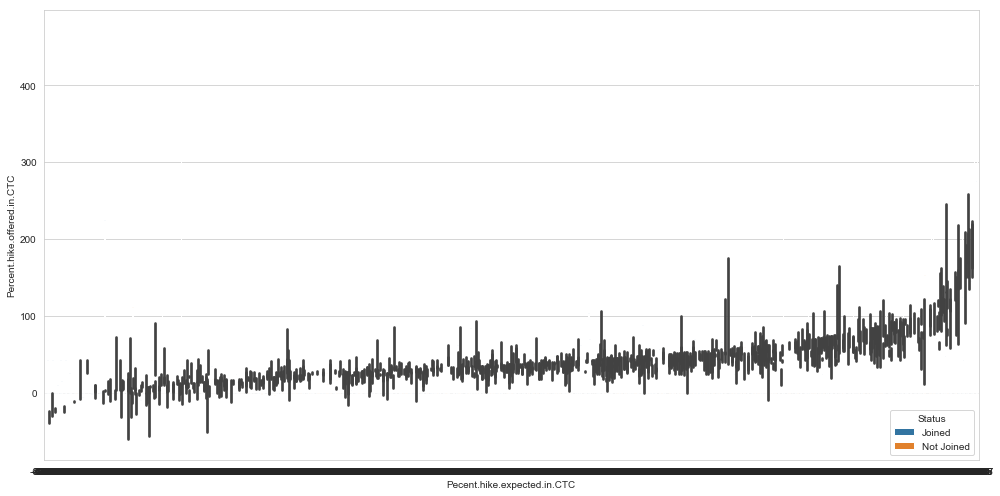

In [22]:
plt.figure(figsize=(14,7))
g = sns.barplot(x=df_uniq['Pecent.hike.expected.in.CTC'],y=df_uniq['Percent.hike.offered.in.CTC'],hue=df_uniq['Status'])
plt.tight_layout()

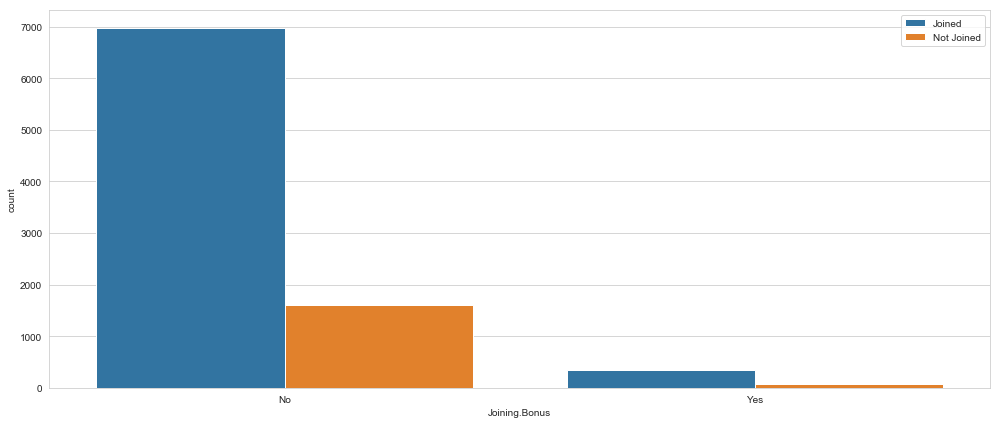

In [23]:
plt.figure(figsize=(14,6))
sns.countplot(df_uniq['Joining.Bonus'],hue=df_uniq['Status'])
plt.tight_layout()
plt.legend(loc=1)

In [24]:
#to look number of group in the column
df_uniq['Candidate.Source'].unique()

array(['Agency', 'Employee Referral', 'Direct'], dtype=object)

In [25]:
print(df_uniq[df_uniq['Candidate.Source']=='Agency'].count())
print(df_uniq[df_uniq['Candidate.Source']=='Employee Referral'].count())
print(df_uniq[df_uniq['Candidate.Source']=='Direct'].count())

SLNO                           2585
Candidate.Ref                  2585
DOJ.Extended                   2585
Duration.to.accept.offer       2585
Notice.period                  2585
Offered.band                   2585
Pecent.hike.expected.in.CTC    2585
Percent.hike.offered.in.CTC    2585
Percent.difference.CTC         2585
Joining.Bonus                  2585
Candidate.relocate.actual      2585
Gender                         2585
Candidate.Source               2585
Rex.in.Yrs                     2585
LOB                            2585
Location                       2585
Age                            2585
Status                         2585
dtype: int64
SLNO                           1609
Candidate.Ref                  1609
DOJ.Extended                   1609
Duration.to.accept.offer       1609
Notice.period                  1609
Offered.band                   1609
Pecent.hike.expected.in.CTC    1609
Percent.hike.offered.in.CTC    1609
Percent.difference.CTC         1609
Joining.Bonus  

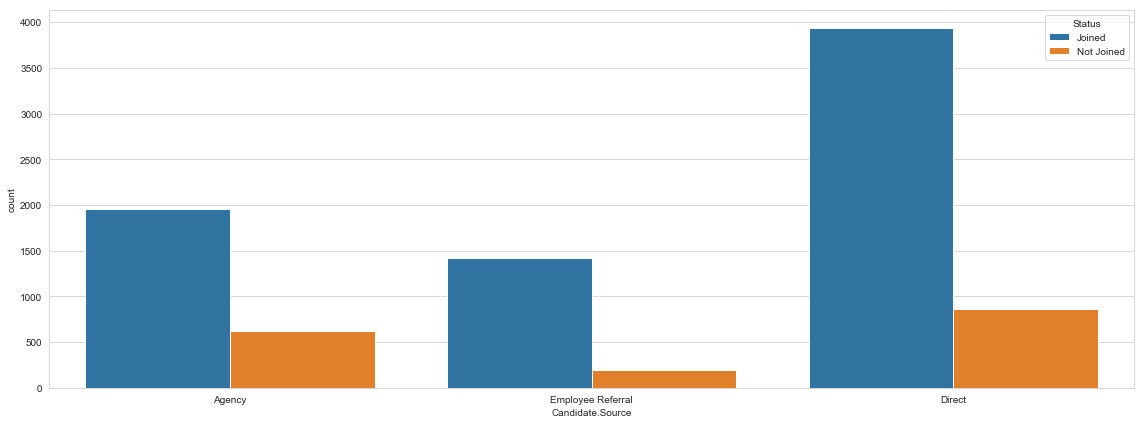

In [26]:
plt.figure(figsize=(16,6))
sns.countplot(df_uniq['Candidate.Source'],hue=df_uniq['Status'])
plt.tight_layout()

In [27]:
df_uniq['LOB'].unique()

array(['ERS', 'INFRA', 'Healthcare', 'BFSI', 'CSMP', 'ETS', 'AXON', 'EAS',
       'MMS'], dtype=object)

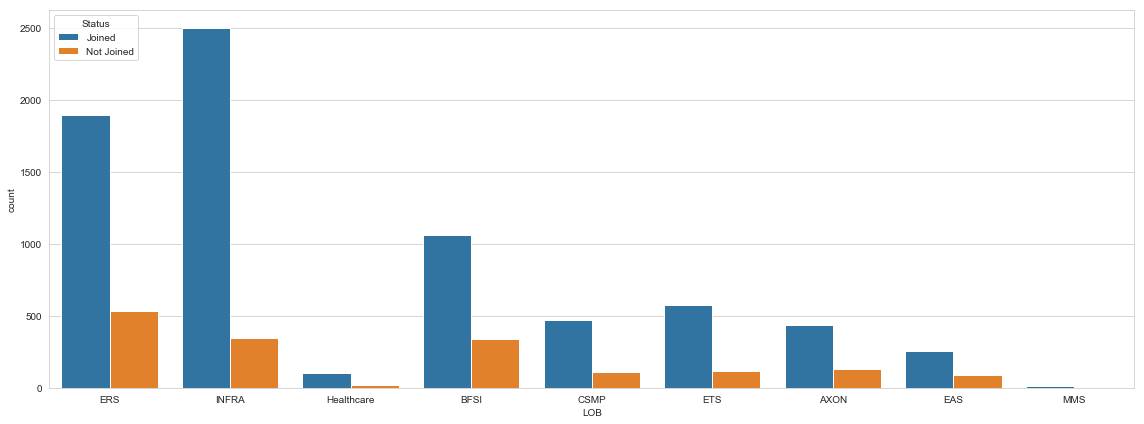

In [28]:
plt.figure(figsize=(16,6))
sns.countplot(df_uniq['LOB'],hue=df_uniq['Status'])
plt.tight_layout()

Functions to convert char variables to integer.

In [29]:
def lob(x):
    if x == "ERS":
        return 1
    elif x == "INFRA":
        return 2
    elif x == "Healthcare":
        return 3
    elif x == "BFSI":
        return 4
    elif x == "CSMP":
        return 5
    elif x == "ETS":
        return 6
    elif x == "AXON":
        return 7
    elif x == "EAS":
        return 8
    elif x == "MMS":
        return 9
   

In [30]:

df_uniq['lob'] =df_uniq['LOB'].apply(lob)

In [31]:
def ref(x):
    if x == "Agency":
        return 1
    elif x == "Employee Referral":
        return 2
    elif x == "Direct":
        return 3

In [32]:
df_uniq['ref'] =df_uniq['Candidate.Source'].apply(ref)

In [33]:
def gender_class(x):
    if x == "Female":
        return 1
    elif x == "Male":
        return 2


In [34]:
df_uniq['gender_class'] =df_uniq['Gender'].apply(gender_class)

In [35]:
def relocate(x):
    if x == "Yes":
        return 1
    elif x == "No":
        return 2

In [36]:
df_uniq['relocate'] =df_uniq['Candidate.relocate.actual'].apply(relocate)

In [37]:
def bonus(x):
    if x == "Yes":
        return 1
    elif x == "No":
        return 2

In [38]:
df_uniq['bonus'] =df_uniq['Joining.Bonus'].apply(bonus)

In [39]:
df_uniq['Offered.band' ].unique()

array(['E2', 'E1', 'E3', 'E0'], dtype=object)

In [40]:
def band(x):
    if x == "E0":
        return 1
    elif x == "E1":
        return 2
    elif x == "E2":
        return 3
    elif x == "E3":
        return 4
    

In [41]:
df_uniq['band'] =df_uniq['Offered.band'].apply(band)

In [42]:
def extended(x):
    if x == "Yes":
        return 1
    elif x == "No":
        return 2

In [43]:
df_uniq['extended'] =df_uniq['DOJ.Extended'].apply(extended)

In [44]:
df_uniq['Location'].unique()

array(['Noida', 'Chennai', 'Gurgaon', 'Bangalore', 'Hyderabad', 'Kolkata',
       'Cochin', 'Pune', 'Others', 'Mumbai', 'Ahmedabad'], dtype=object)

In [45]:
def location(x):
    if x == "Noida":
        return 1
    elif x == "Chennai":
        return 2
    elif x == "Gurgaon":
        return 3
    elif x == "Bangalore":
        return 4
    elif x == "Hyderabad":
        return 5
    elif x == "Kolkata":
        return 6
    elif x == "Cochin":
        return 7
    elif x == "Pune":
        return 8
    elif x == "Others":
        return 9
    elif x == "Mumbai":
        return 10
    elif x == "Ahmedabad":
        return 11

In [46]:
df_uniq['location'] =df_uniq['Location'].apply(location)

Logistic Model

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
from sklearn.metrics import classification_report,confusion_matrix


In [49]:
LogisticRegression(solver='lbfgs')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
X = df_uniq[['extended','Duration.to.accept.offer','Notice.period','band','Pecent.hike.expected.in.CTC','Percent.hike.offered.in.CTC','bonus','relocate',    
'gender_class', 'ref','Rex.in.Yrs','lob','Age']]
y =df_uniq['Status']

Divide the data into Training and Testing datasets.

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [52]:
logmodel = LogisticRegression()

In [53]:
logmodel.fit(X_train,y_train)
LogisticRegression(solver='lbfgs')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Apply the model on test dataset

In [54]:
predictions = logmodel.predict(X_test)

Outcome  of model

In [55]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

      Joined       0.82      0.99      0.90      2206
  Not Joined       0.47      0.06      0.10       493

   micro avg       0.82      0.82      0.82      2699
   macro avg       0.65      0.52      0.50      2699
weighted avg       0.76      0.82      0.75      2699

[[2175   31]
 [ 465   28]]


In [56]:
train_acc=logmodel.score(X_train,y_train)
print(train_acc)
test_acc=logmodel.score(X_test,y_test)
print(test_acc)

0.8092439644218552
0.8162282326787699


This model does not fit well.<br>
Considering other varibles in the model.

In [57]:
X = df_uniq[['Notice.period','ref','relocate','location']]
y =df_uniq['Status']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [59]:
logmodel = LogisticRegression()

In [60]:
logmodel.fit(X_train,y_train)
LogisticRegression(solver='lbfgs')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
predictions = logmodel.predict(X_test)

In [62]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

      Joined       0.82      1.00      0.90      2206
  Not Joined       0.56      0.01      0.02       493

   micro avg       0.82      0.82      0.82      2699
   macro avg       0.69      0.50      0.46      2699
weighted avg       0.77      0.82      0.74      2699

[[2202    4]
 [ 488    5]]


In [63]:
acc=logmodel.score(X_test,y_test)
acc

0.8177102630603927

Accuracy of the model=0.816

In [64]:
X = df_uniq[['Notice.period','ref','location','relocate','Percent.difference.CTC','Rex.in.Yrs']]
y =df_uniq['Status']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [66]:
logmodel = LogisticRegression()

In [67]:
logmodel.fit(X_train,y_train)
LogisticRegression(solver='lbfgs')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
predictions = logmodel.predict(X_test)

In [69]:
acc=logmodel.score(X_test,y_test)
acc

0.8195628010374213

In [70]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

      Joined       0.82      1.00      0.90      2206
  Not Joined       0.71      0.02      0.04       493

   micro avg       0.82      0.82      0.82      2699
   macro avg       0.77      0.51      0.47      2699
weighted avg       0.80      0.82      0.74      2699

[[2202    4]
 [ 483   10]]


In [71]:
acc=logmodel.score(X_test,y_test)
acc

0.8195628010374213

In [72]:
X = df_uniq[['Notice.period','Percent.hike.offered.in.CTC','Percent.difference.CTC','Age','Duration.to.accept.offer','Rex.in.Yrs']]
y =df_uniq['Status']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [74]:
logmodel = LogisticRegression()

In [75]:
logmodel.fit(X_train,y_train)
LogisticRegression(solver='lbfgs')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [76]:
predictions = logmodel.predict(X_test)

In [77]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

      Joined       0.82      1.00      0.90      2206
  Not Joined       0.44      0.01      0.02       493

   micro avg       0.82      0.82      0.82      2699
   macro avg       0.63      0.50      0.46      2699
weighted avg       0.75      0.82      0.74      2699

[[2201    5]
 [ 489    4]]


The logistic model is not fitted.Considering other set of columns.

In [138]:
X = df_uniq[['Notice.period','Percent.difference.CTC','ref','relocate','location','extended']]
y =df_uniq['Status']

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [140]:
logmodel = LogisticRegression()

In [141]:
logmodel.fit(X_train,y_train)
LogisticRegression(solver='lbfgs')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [142]:
predictions = logmodel.predict(X_test)

In [143]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

      Joined       0.82      1.00      0.90      2206
  Not Joined       0.75      0.02      0.05       493

   micro avg       0.82      0.82      0.82      2699
   macro avg       0.79      0.51      0.47      2699
weighted avg       0.81      0.82      0.74      2699

[[2202    4]
 [ 481   12]]


In [144]:
train_acc=logmodel.score(X_train,y_train)
print(train_acc)
test_acc=logmodel.score(X_test,y_test)
print(test_acc)

0.8116264294790343
0.8203038162282327


In [ ]:
from sklearn.metrics import accuracy_score

In [174]:
X = df_uniq[['extended','Duration.to.accept.offer','Notice.period','band','Pecent.hike.expected.in.CTC','Percent.hike.offered.in.CTC','bonus','relocate',    
'gender_class', 'ref','Rex.in.Yrs','lob','Age']]
y =df_uniq['Status']

In [175]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [176]:
from sklearn.metrics import accuracy_score
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.785


In [177]:
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() # Gaussian Naive Bayes
gnb.fit(X_train,y_train
gnbpred = gnb.predict_proba(X_test)
print (roc_auc_score(y_test,gnbpred[:,1]))

SyntaxError: invalid syntax (<ipython-input-177-228c41a8878e>, line 5)

In [178]:
gnbpred

array([[2.49040080e-04, 9.99750960e-01],
       [1.10191703e-02, 9.88980830e-01],
       [1.70168961e-02, 9.82983104e-01],
       ...,
       [8.77680381e-03, 9.91223196e-01],
       [5.35805592e-03, 9.94641944e-01],
       [9.79135270e-03, 9.90208647e-01]])

In [179]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# train the model using X_train_scaled (timing it with an IPython "magic command")
nb.fit(X_train, y_train)


ValueError: Input X must be non-negative

In [180]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_train)

In [181]:
y_pred

array(['Not Joined', 'Not Joined', 'Joined', ..., 'Not Joined', 'Joined',
       'Not Joined'], dtype='<U10')